# Amazon Prime EDA Project

### Project Summary :-This project performs Exploratory Data Analysis (EDA) on a merged dataset of movies and TV shows, using two CSV files: titles.csv and credits.csv. The goal is to uncover insights about IMDb and TMDB scores, genre distributions, runtime trends, and correlations between numerical features. The dataset is cleaned by handling missing values, duplicate entries, and outliers, followed by various visualizations to understand trends in movie and TV show data. By analyzing this dataset,businesses,content creators we can uncover key trends that influence subscription growth,user engagement, and content investment strategies in the streaming industry.

### Importing libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

### Loading the Dataset

In [79]:
df1 = pd.read_csv(r"C:\Users\DELL\Music\amazon prime EDA project\titles.csv")

In [81]:
df2 = pd.read_csv(r"C:\Users\DELL\Music\amazon prime EDA project\credits.csv")

In [83]:
df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [85]:
df2.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [87]:
df1.shape

(9871, 15)

In [89]:
df2.shape

(124235, 5)

In [91]:
print(df1.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


In [93]:
print(df2.columns)

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


### Merging the dataset

In [97]:
# Merge datasets on 'id'
df = pd.merge(df1, df2, on="id", how="left")

In [99]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR


In [101]:
df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
125349,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,1938565.0,Vijay Thakur,Sanjay Thakur,ACTOR
125350,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,728899.0,Vanya Wellens,Budhiya,ACTOR
125351,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,1938620.0,Vishwa Bhanu,Gissu,ACTOR
125352,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,1938620.0,Vishwa Bhanu,NaN,DIRECTOR
125353,ts275838,Waking Up Eighty,SHOW,"Kara Stewart, 16, is fed up with just about ev...",2021,NaN,10,['drama'],[],1.0,tt13542552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.shape

(125354, 19)

### Data type and missing value 

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            114263 non-null  float64
 15  

In [109]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,125354.000000,125354.00000,8501.000000,118987.000000,1.189570e+05,124800.000000,114263.000000,1.243470e+05
mean,1996.374715,95.30792,2.335372,5.970856,2.311206e+04,10.134483,5.993077,4.062528e+05
std,27.758800,30.39349,3.164860,1.243967,8.816389e+04,40.666765,1.322900,5.614483e+05
min,1912.000000,1.00000,1.000000,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00
25%,1983.000000,82.00000,1.000000,5.200000,2.790000e+02,1.858000,5.300000,3.899600e+04
50%,2009.000000,93.00000,1.000000,6.100000,1.227000e+03,3.864000,6.100000,1.339340e+05
75%,2017.000000,109.00000,2.000000,6.800000,7.039000e+03,8.787000,6.800000,5.711600e+05
max,2022.000000,549.00000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


In [111]:
df.nunique()

id                       9868
title                    9737
type                        2
description              9734
release_year              110
age_certification          11
runtime                   207
genres                   2028
production_countries      497
seasons                    32
imdb_id                  9201
imdb_score                 86
imdb_votes               3650
tmdb_popularity          5325
tmdb_score                 89
person_id               80508
name                    79758
character               71097
role                        2
dtype: int64

In [113]:
# Check for missing values
df.isnull().sum()

id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68497
runtime                      0
genres                       0
production_countries         0
seasons                 116853
imdb_id                   5376
imdb_score                6367
imdb_votes                6397
tmdb_popularity            554
tmdb_score               11091
person_id                 1007
name                      1007
character                17314
role                      1007
dtype: int64

### Check and remove duplicate rows

In [129]:
print("Duplicate Rows Before Removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate Rows After Removal:", df.duplicated().sum())

Duplicate Rows Before Removal: 168
Duplicate Rows After Removal: 0


### Handle missing values

In [131]:
df.fillna({
    "description": "No description available",
    "age_certification": "Unknown",
    "imdb_score": df["imdb_score"].median(),
    "tmdb_score": df["tmdb_score"].median()
}, inplace=True)

### IMDb Score Distribution

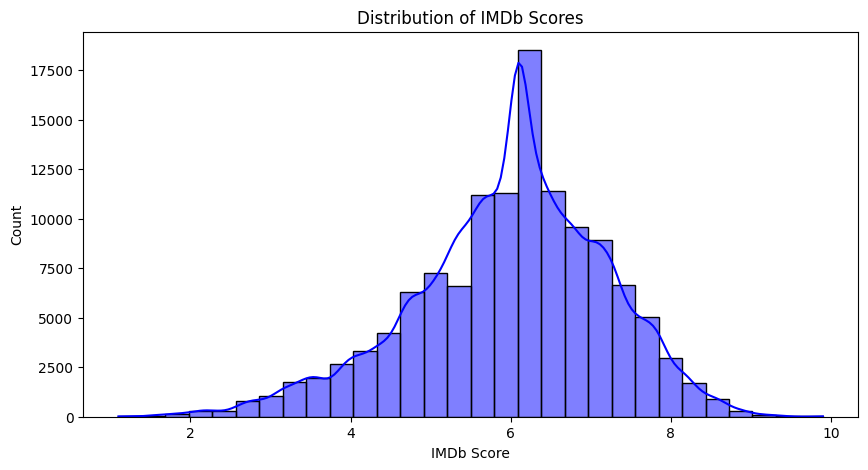

In [133]:
plt.figure(figsize=(10, 5))
sns.histplot(df["imdb_score"].dropna(), bins=30, kde=True, color="blue")
plt.xlabel("IMDb Score")
plt.ylabel("Count")
plt.title("Distribution of IMDb Scores")
plt.show()

In [136]:
# Extract genres
genre_list = []
for genres in df["genres"].dropna():
    try:
        genre_list.extend(ast.literal_eval(genres))  # Convert string to list
    except (ValueError, SyntaxError):
        continue

In [138]:
# Count genre occurrences
genre_counts = Counter(genre_list)
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

### Plot most common genres

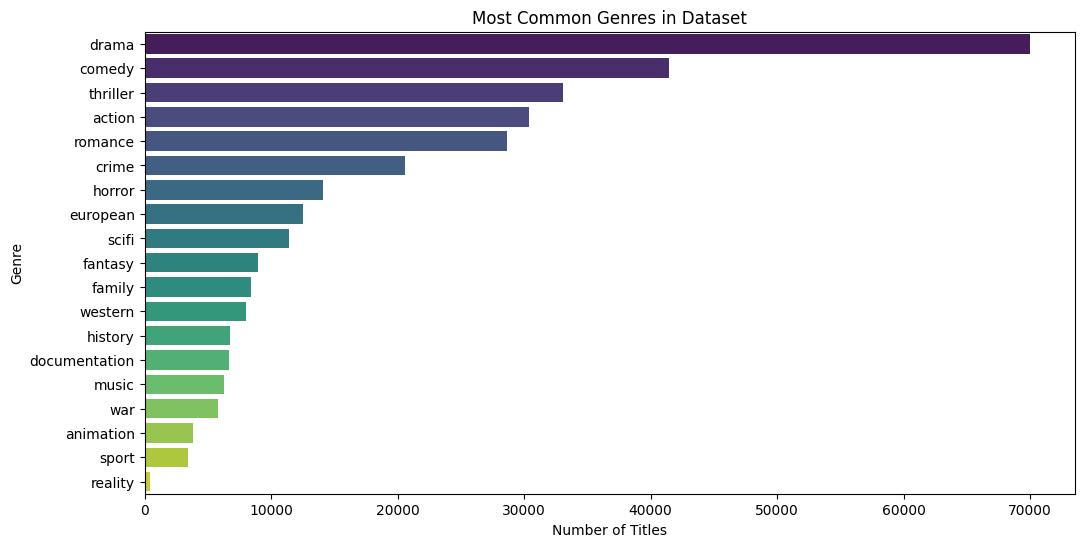

In [140]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Genre", data=genre_df, palette="viridis")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.title("Most Common Genres in Dataset")
plt.show()

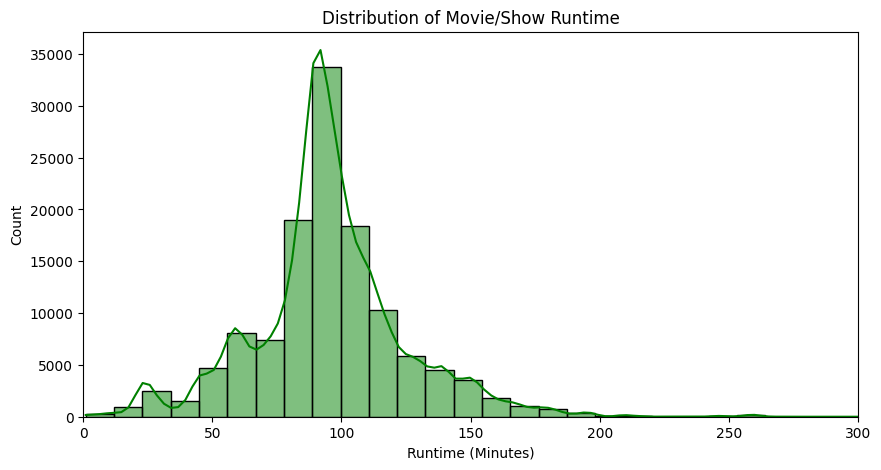

In [142]:
# Runtime Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["runtime"], bins=50, kde=True, color="green")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Count")
plt.title("Distribution of Movie/Show Runtime")
plt.xlim(0, 300)  # Limit for better visualization
plt.show()

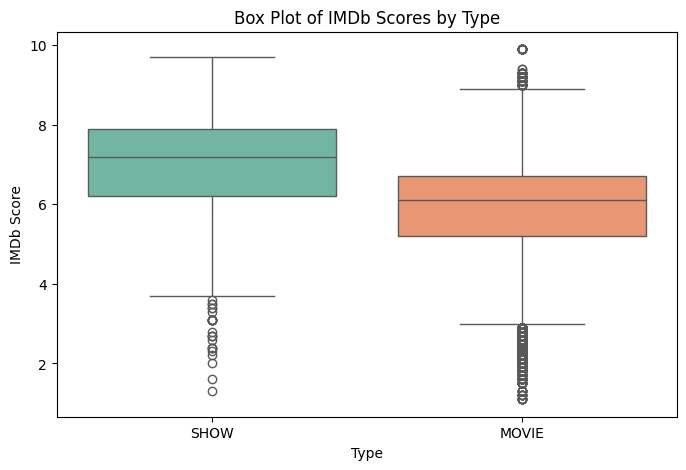

In [144]:
# Box Plot: IMDb Scores by Type
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["type"], y=df["imdb_score"], palette="Set2")
plt.xlabel("Type")
plt.ylabel("IMDb Score")
plt.title("Box Plot of IMDb Scores by Type")
plt.show()

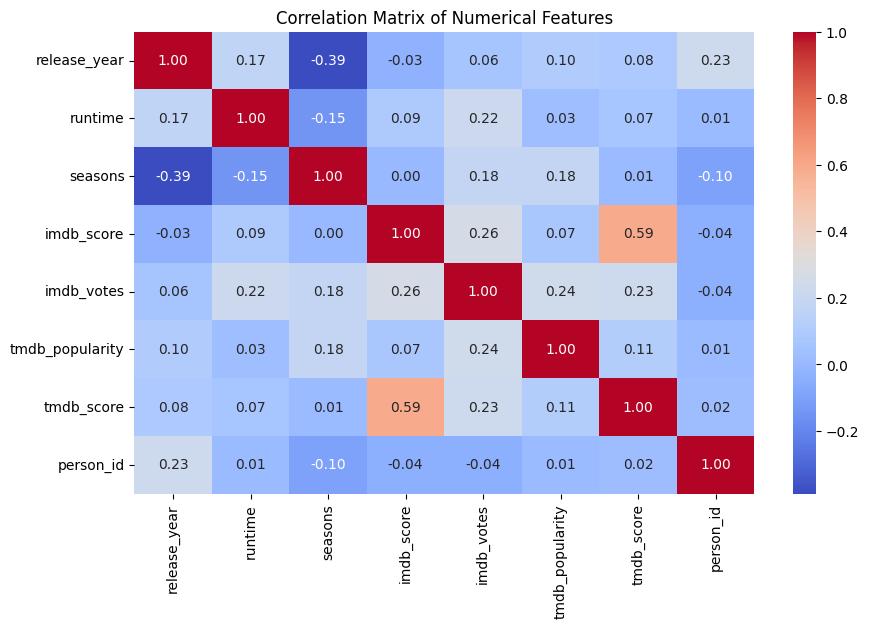

In [146]:
# Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

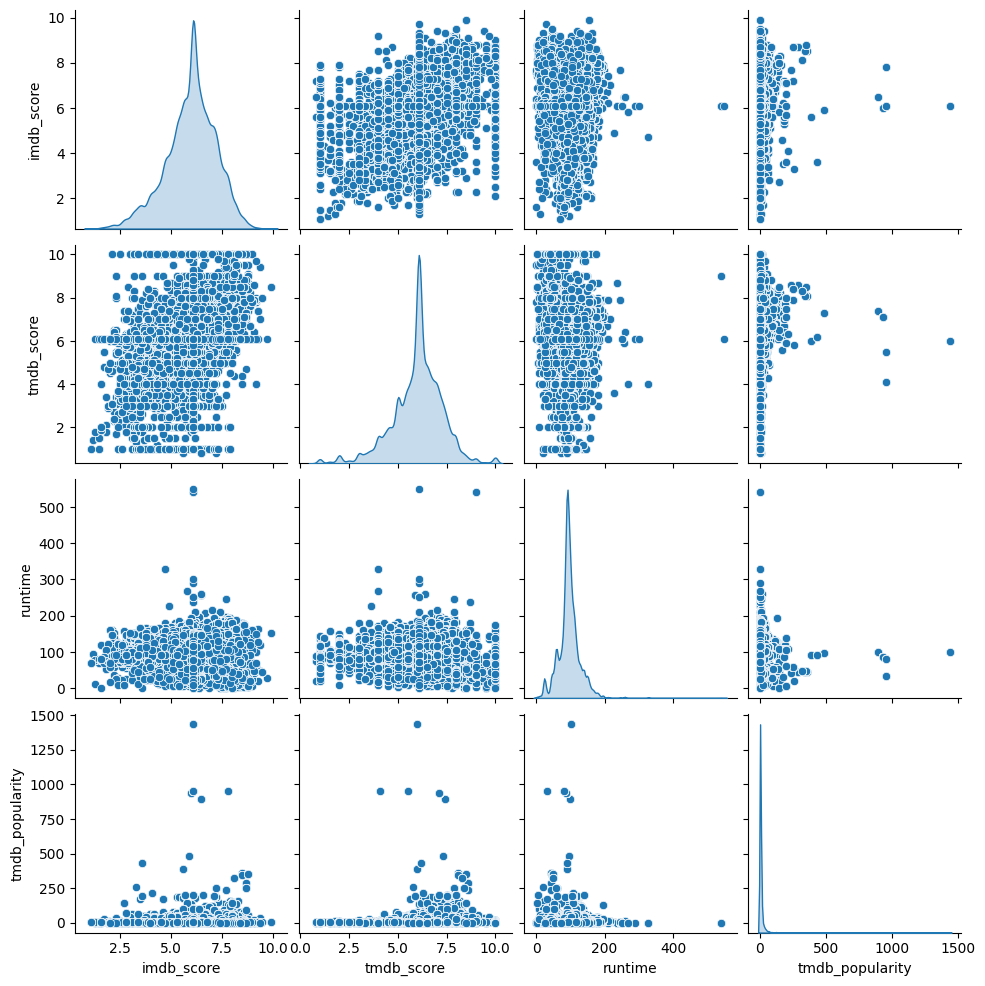

In [148]:
# Pair Plot: Numerical Feature Relationships
sns.pairplot(df, vars=["imdb_score", "tmdb_score", "runtime", "tmdb_popularity"], diag_kind="kde")
plt.show()

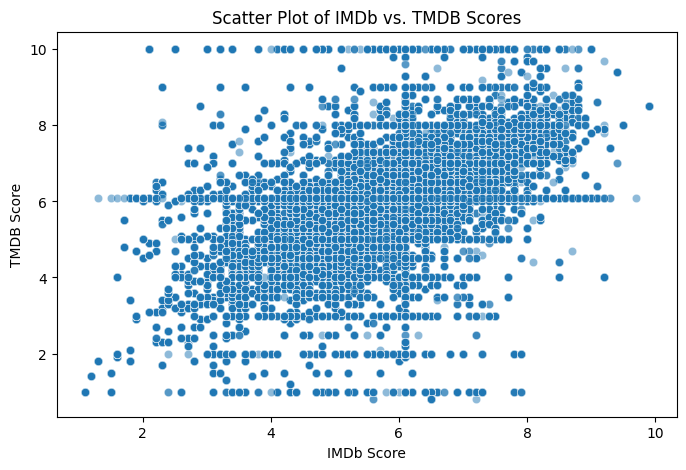

In [150]:
# Scatter Plot: IMDb Score vs. TMDB Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["imdb_score"], y=df["tmdb_score"], alpha=0.5)
plt.xlabel("IMDb Score")
plt.ylabel("TMDB Score")
plt.title("Scatter Plot of IMDb vs. TMDB Scores")
plt.show()

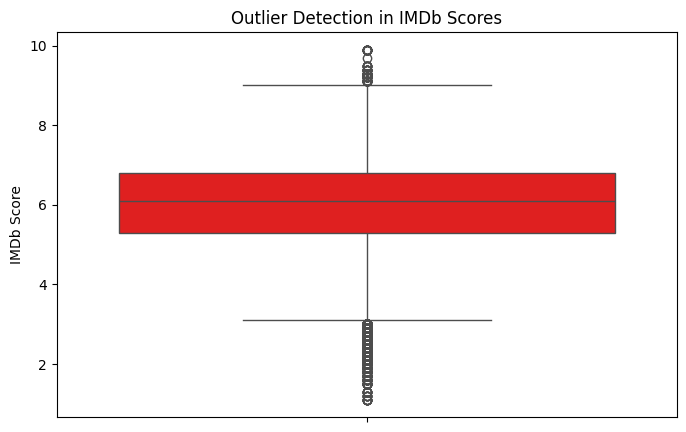

In [152]:
# Outlier Detection: IMDb Score
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["imdb_score"], color="red")
plt.ylabel("IMDb Score")
plt.title("Outlier Detection in IMDb Scores")
plt.show()

## Conclusion

After conducting an in-depth analysis, we found the following key insights:

* Drama and Comedy are the most common genres, indicating audience preference.
* IMDb and TMDB scores are positively correlated, meaning both platforms share similar rating patterns.
* The majority of movies and shows have a runtime between 60 to 120 minutes, which aligns with typical industry standards.
* Outliers exist in IMDb scores, with some titles receiving exceptionally low or high ratings, suggesting critical hits or flops.
* TV Shows tend to have a wider range of IMDb scores compared to movies, but their median scores remain similar.